In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [14]:
# pull csv file
df = pd.read_csv('AB_NYC_2019_clean.csv')
df.head()

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
# create new df for neighbourhood and room type
br_df = df[['id','neighbourhood_group','room_type','price']]
br_df.head()
br_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [16]:
#create bounds
lowerq = br_df['price'].quantile([.25,.5,.75])[0.25]
upperq = br_df['price'].quantile([.25,.5,.75])[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

br_df = br_df.loc[(br_df['price'] > 0) & (br_df['price'] < upper_bound) ]

In [17]:
brooklyn_df = br_df.loc[(br_df['neighbourhood_group'] == 'Brooklyn')]
manhattan_df = br_df.loc[(br_df['neighbourhood_group'] == 'Manhattan')]
queens_df = br_df.loc[(br_df['neighbourhood_group'] == 'Queens')]
bronx_df = br_df.loc[(br_df['neighbourhood_group'] == 'Bronx')]
staten_island_df = br_df.loc[(br_df['neighbourhood_group'] == 'Staten Island')]

<Figure size 432x288 with 0 Axes>

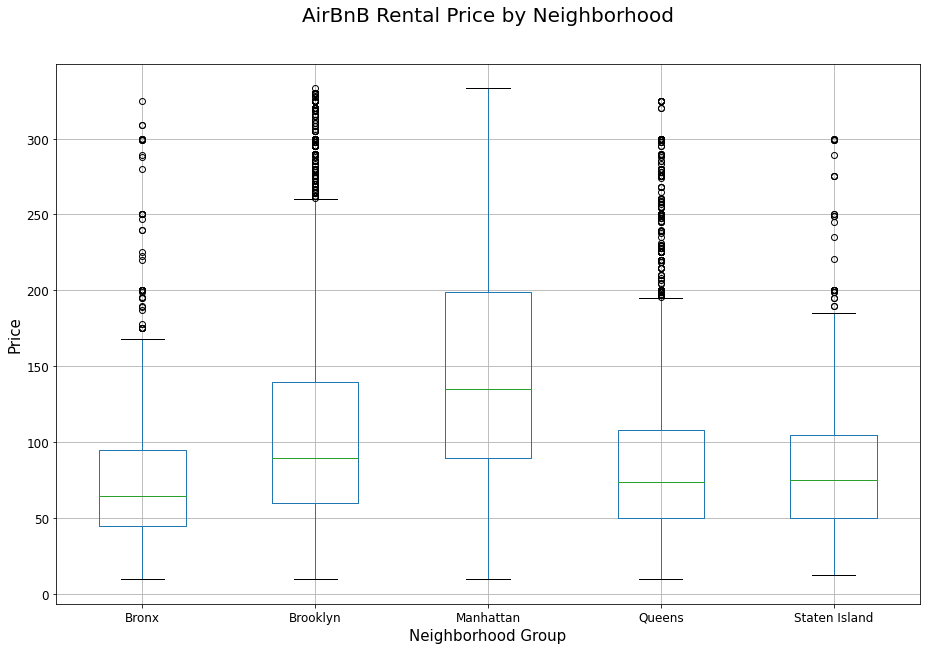

In [25]:
plt.figure()
br_boxplot = br_df.boxplot(column=['price'], by=['neighbourhood_group'],figsize=(15,10),fontsize = 12)
plt.ylabel('Price',fontsize=15)
plt.xlabel('Neighborhood Group',fontsize=15)
plt.title('')

fig = br_boxplot.get_figure()
fig.suptitle('AirBnB Rental Price by Neighborhood',fontsize=20)

plt.savefig("BoxPlotv1.png")
plt.show()


In [23]:
groups = br_df.groupby(['neighbourhood_group'])
groups.mean()

,id,price
neighbourhood_group,,
Bronx,2.275538e+07,77.437792
Brooklyn,1.824075e+07,105.748634
Manhattan,1.847219e+07,145.912103
Queens,2.174978e+07,88.904437
Staten Island,2.172860e+07,89.235616
